# MATH 693A Advanced Numerical Methods: Computational Optimization HW 2
### By Will McGrath

In [273]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from scipy import interpolate

# Problem 1 and 2
### Use  $c = 10^{-4}$, $c_2 = 0.9$, and $ \alpha_{max} = 1 $

In [2]:
# Rosenbrock function
def objective_func(xbar_k):
    x = xbar_k[0]
    y = xbar_k[1]

    return 100*(y - x**2)**2 + (1 - x)**2

def gradient(xbar_k):
    x = xbar_k[0]
    y = xbar_k[1]

    return np.array([400*x**3 - 400*x*y + 2*x - 2, 200*(y - x**2)])

def hessian(xbar_k):
    x = xbar_k[0]
    y = xbar_k[1]
    
    return np.array([[1200*x**2 - 400*y + 2, -400*x],[-400*x, 200]])

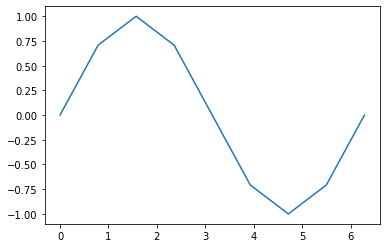

In [3]:
x = np.arange(0, 2*np.pi+np.pi/4, 2*np.pi/8) # start, end, diff
y = np.sin(x)

plt.plot(x,y)

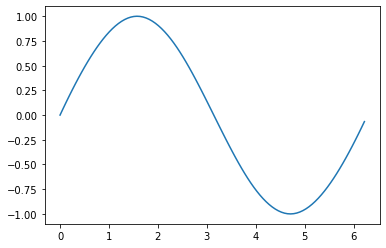

In [4]:
tck = interpolate.splrep(x, y, s=0)
xnew = np.arange(0, 2*np.pi, np.pi/50)
ynew = interpolate.splev(xnew, tck, der=0)
plt.plot(xnew,ynew)

### Steepest Descent

## $ \bar{p_{k}}^{SD} =  -\frac{\nabla f(\bar{x}_{k})}{|\nabla f(\bar{x}_{k})|}$

In [17]:
# steepest descent algorithm (gradient descent using backtracking line search)
# the backtracking algorithm only makes use of the first Wolfe condition, the Armijo condition
# we do not have to make use of the second Wolfe condition, only condition we have to satisfy is the Armijo condition
# linear convergence

def steepest_descent(x0, objective_func, grad, val, abs_stop=True):
    # set alpha_0 = 1, rho = 1/2, c = 10^-4
    rho = 1/2
    c = 10**-4
    i = 1
    xbar_trans = x0 # use the initial step x0
    i_list, xbar_trans_list, obj_func_xbar_list, pbar_list, alpha_list  = [], [], [], [], []
    if abs_stop:
        while np.abs(objective_func(xbar_trans)) > val: 
            if i > 1:
                xbar_trans = xbar_trans + alpha * pbar_k

            # find descent direction pbar_k
            pbar_k = - (grad(xbar_trans)) / (np.linalg.norm(grad(xbar_trans)))
            alpha = 1
            while(objective_func(xbar_trans + alpha * pbar_k) > objective_func(xbar_trans) + c * alpha * np.dot(pbar_k, grad(xbar_trans))):
                alpha = rho * alpha 

            i_list.append(i)
            xbar_trans_list.append(xbar_trans)
            obj_func_xbar_list.append(objective_func(xbar_trans))
            pbar_list.append(pbar_k)
            alpha_list.append(alpha)
            i += 1

    else:
        while np.linalg.norm(grad(xbar_trans)) > val: 
            if i > 1:
                xbar_trans = xbar_trans + alpha * pbar_k

            # find descent direction pbar_k
            pbar_k = - (grad(xbar_trans)) / (np.linalg.norm(grad(xbar_trans)))
            alpha = 1
            while(objective_func(xbar_trans + alpha * pbar_k) > objective_func(xbar_trans) + c * alpha * np.dot(pbar_k, grad(xbar_trans))):
                alpha = rho * alpha 

            i_list.append(i)
            xbar_trans_list.append(xbar_trans)
            obj_func_xbar_list.append(objective_func(xbar_trans))
            pbar_list.append(pbar_k)
            alpha_list.append(alpha)
            i += 1

    steepest_descent_df = pd.DataFrame(
        [[i_list, xbar_trans_list, obj_func_xbar_list, pbar_list, alpha_list]], 
        columns=['iteration', 'xbar', 'f(xbar)', 'pbar', 'alpha']
    ).explode(['iteration', 'xbar', 'f(xbar)', 'pbar', 'alpha']).reset_index(drop=True)

    return steepest_descent_df

### Newton Method

## $ \bar{p_{k}}^{N} =  - \begin{bmatrix} \nabla^{2} f(\bar{x}_{k}) \end{bmatrix}^{-1} \nabla f(\bar{x}_{k}) $

In [55]:
# newton method algorithm (newton method using backtracking line search)
# the backtracking algorithm only makes use of the first Wolfe condition, the Armijo condition
# we do not have to make use of the second Wolfe condition, only condition we have to satisfy is the Armijo condition
# quadratic convergence

def newton_method(x0, objective_func, grad, hess, val, abs_stop=True):
    # set alpha_0 = 1, rho = 1/2, c = 10^-4
    rho = 1/2
    c = 10**-4
    i = 1
    xbar_trans = x0 # use the initial step x0
    i_list, xbar_trans_list, obj_func_xbar_list, pbar_list, alpha_list  = [], [], [], [], []
    if abs_stop:
        while np.abs(objective_func(xbar_trans)) > val: 
            if i > 1:
                xbar_trans = xbar_trans + alpha * pbar_k

            # find descent direction pbar_k
            try: 
                pbar_k = np.dot(- np.linalg.inv(hess(xbar_trans)), grad(xbar_trans))
            except: 
                break
                
            alpha = 1
            while(objective_func(xbar_trans + alpha * pbar_k) > objective_func(xbar_trans) + c * alpha * np.dot(pbar_k, grad(xbar_trans))):
                alpha = rho * alpha 

            i_list.append(i)
            xbar_trans_list.append(xbar_trans)
            obj_func_xbar_list.append(objective_func(xbar_trans))
            pbar_list.append(pbar_k)
            alpha_list.append(alpha)
            i += 1

    else:
        while np.linalg.norm(grad(xbar_trans)) > val: 
            if i > 1:
                xbar_trans = xbar_trans + alpha * pbar_k

            # find descent direction pbar_k
            try: 
                pbar_k = np.dot(- np.linalg.inv(hess(xbar_trans)), grad(xbar_trans))
            except: 
                break
                
            alpha = 1
            while(objective_func(xbar_trans + alpha * pbar_k) > objective_func(xbar_trans) + c * alpha * np.dot(pbar_k, grad(xbar_trans))):
                alpha = rho * alpha 

            i_list.append(i)
            xbar_trans_list.append(xbar_trans)
            obj_func_xbar_list.append(objective_func(xbar_trans))
            pbar_list.append(pbar_k)
            alpha_list.append(alpha)
            i += 1

    newton_method_df = pd.DataFrame(
        [[i_list, xbar_trans_list, obj_func_xbar_list, pbar_list, alpha_list]], 
        columns=['iteration', 'xbar', 'f(xbar)', 'pbar', 'alpha']
    ).explode(['iteration', 'xbar', 'f(xbar)', 'pbar', 'alpha']).reset_index(drop=True)

    return newton_method_df

In [5]:
def phi(obj_func, xbar_trans, alpha, pbar_k):
    return obj_func(xbar_trans + alpha * np.array(pbar_k)) 

def derphi(grad, xbar_trans, alpha, pbar_k):
    val = grad(xbar_trans + alpha * np.array(pbar_k))
    return np.dot(val, pbar_k)

In [6]:
# try implementing **args
def interp(alpha_low, alpha_high, obj_func, grad, xbar_trans, pbar_k):
    e1 = 0.1
    e2 = 0.1
    alpha_km1 = alpha_low
    alpha_k = alpha_high
    
    d1 = derphi(grad, xbar_trans, alpha_km1, pbar_k) + derphi(grad, xbar_trans, alpha_k, pbar_k) - \
        3*((phi(obj_func, xbar_trans, alpha_km1, pbar_k) - phi(obj_func, xbar_trans, alpha_k, pbar_k)) / (alpha_km1 - alpha_k))
        
    d2 = ((alpha_k - alpha_km1) / np.abs(alpha_k - alpha_km1)) * np.sqrt(d1**2 - derphi(grad, xbar_trans, alpha_km1, pbar_k) * derphi(grad, xbar_trans, alpha_k, pbar_k))

    alpha_kp1 = alpha_k - (alpha_k - alpha_km1) * ((derphi(grad, xbar_trans, alpha_k, pbar_k) + d2 - d1) / 
                (derphi(grad, xbar_trans, alpha_k, pbar_k) - derphi(grad, xbar_trans, alpha_km1, pbar_k) + 2 * d2))

    # safeguards 
    if np.abs(alpha_kp1 - alpha_k) < e1 or np.abs(alpha_kp1) < e2:
        alpha_kp1 = alpha_k / 2

    return alpha_kp1

In [15]:
# interpolation function
def zoom(alpha_low, alpha_high, obj_func, grad, xbar_trans, pbar_k):
    cnt = 0
    c1 = 10**-4
    c2 = 0.9 

    while True:
        # interpolate using Hermite-based cubic interpolation to find a trial step length alpha_j b/t alpha_low and alpha_high
        alpha_j =  interp(alpha_low, alpha_high, obj_func, grad, xbar_trans, pbar_k) # (alpha_low + alpha_high) / 2
        phi_alpha_j = phi(obj_func, xbar_trans, alpha_j, pbar_k)

        # conditions
        cond1 = phi_alpha_j > phi(obj_func, xbar_trans, 0, pbar_k) + c1 * alpha_j * derphi(grad, xbar_trans, 0, pbar_k)
        cond2 = phi_alpha_j >= phi(obj_func, xbar_trans, alpha_low, pbar_k)
        if cond1 or cond2:
            alpha_high = alpha_j

        else:
            derphi_alpha_j = derphi(grad, xbar_trans, alpha_j, pbar_k)
            if np.abs(derphi_alpha_j) <= -c2 * derphi(grad, xbar_trans, 0, pbar_k):
                alpha_star = alpha_j
                return alpha_star

            if (derphi_alpha_j * (alpha_high - alpha_low)) >= 0: 
                alpha_high = alpha_low
            
            alpha_low = alpha_j
       
        cnt += 1
        print(f'Count: {cnt}')
        print(f'alpha_j: {alpha_j}')
        print(f'alpha_high: {alpha_high}')
        print(f'alpha_low: {alpha_low}')

In [21]:
zoom(1, 1.2, objective_func, gradient, [1.2, 1.2], [-1,1])

Count: 1
alpha_j: -0.30785905977707007
alpha_high: -0.30785905977707007
alpha_low: 1
Count: 2
alpha_j: -0.15392952988853503
alpha_high: -0.15392952988853503
alpha_low: 1
Count: 3
alpha_j: -0.07696476494426752
alpha_high: -0.07696476494426752
alpha_low: 1
Count: 4
alpha_j: -0.03848238247213376
alpha_high: -0.03848238247213376
alpha_low: 1
Count: 5
alpha_j: -0.01924119123606688
alpha_high: -0.01924119123606688
alpha_low: 1
Count: 6
alpha_j: -0.00962059561803344
alpha_high: -0.00962059561803344
alpha_low: 1
Count: 7
alpha_j: -0.00481029780901672
alpha_high: -0.00481029780901672
alpha_low: 1
Count: 8
alpha_j: -0.00240514890450836
alpha_high: -0.00240514890450836
alpha_low: 1
Count: 9
alpha_j: -0.00120257445225418
alpha_high: -0.00120257445225418
alpha_low: 1
Count: 10
alpha_j: -0.00060128722612709
alpha_high: -0.00060128722612709
alpha_low: 1
Count: 11
alpha_j: -0.000300643613063545
alpha_high: -0.000300643613063545
alpha_low: 1
Count: 12
alpha_j: -0.0001503218065317725
alpha_high: -0.0001

0.125

In [281]:
# LS/Strong Wolfe Conditions algorithm
def strong_wolfe_conditions(obj_func, grad, xbar_trans, alpha, pbar_k):
    alpha_0 = 0
    alpha = 0.1
    alpha_max = 1
    c1 = 10**-4
    c2 = 0.9 

    while True:
        phi_alpha_i = phi(obj_func, xbar_trans, alpha, pbar_k)
        cond1 = (phi_alpha_i > phi(obj_func, xbar_trans, 0, pbar_k) + c1 * alpha * derphi(grad, xbar_trans, 0, pbar_k))
        cond2 = ((phi_alpha_i >= phi(obj_func, xbar_trans, alpha, pbar_k)) and i > 1)
        if cond1 or cond2: 
            alpha_star = zoom(alpha, alpha, obj_func, grad, xbar_trans, pbar_k)
            return alpha_star

    alpha = alpha
    alpha_1 = (alpha_1 + alpha_max) / 2
    alpha_ip1 = random.random(alpha*100, alpha_max*100) / 100

    return 

# Problem 3
### You should state in your HW how you computed $\alpha_{i+1}$ on Line 11 of the LS/Strong Wolfe Conditions

=> I computed $\alpha_{i+1}$ by randomly choosing a value in [$\alpha_{i}$, $\alpha_{max}$]. 

# Problem 4
### You should state in your HW the Interpolation method used

=> I used the Hermite-based cubic interpolation method.

# Problem 5 
### You should state in your HW the value of epsilon used

=> The epsilons are located in the safeguards conditions, which are located in the interpolation function. I used $\epsilon_1 = \epsilon_2 = 0.1 $. 

# Problem 6
### Plot the objective function $f(x)$. On the same figure, plot the $x_k$ values at different iterates

In [271]:
sd_df = steepest_descent([1.2, 1.2], objective_func, gradient, 10**-8)
sd_xbar_list = sd_df['xbar'].to_list()
sd_df.head()

,iteration,xbar,f(xbar),pbar,alpha
0,1,"[1.2, 1.2]",5.8,"[-0.9235489582482737, 0.38348053629686124]",0.125
1,2,"[1.0845563802189657, 1.2479350670371077]",0.520845,"[0.907267511011767, -0.420553995894122]",0.03125
2,3,"[1.1129084899380834, 1.2347927546654163]",0.014172,"[-0.9297462793930084, 0.36820083643965007]",0.001953
3,4,"[1.111092579236144, 1.2355118969240875]",0.012439,"[0.7382728174997665, -0.6745022215982363]",0.000488
4,5,"[1.1114530640103137, 1.2351825501361977]",0.012424,"[-0.9949271361792931, 0.10059817937751493]",0.000488


In [186]:
nm_df = newton_method([1.2, 1.2], objective_func, gradient, hessian, 10**-8)
nm_xbar_list = nm_df['xbar'].to_list()
nm_df

,iteration,xbar,f(xbar),pbar,alpha
0,1,"[1.2, 1.2]",5.8,"[-0.004081632653060607, 0.23020408163265405]",1
1,2,"[1.1959183673469393, 1.430204081632654]",0.038384,"[-0.19526774595262214, -0.4670319081452387]",0.5
2,3,"[1.0982844943706283, 1.1966881275600347]",0.018762,"[-0.03379633511182467, -0.0646952786248296]",1
3,4,"[1.0644881592588036, 1.1319928489352051]",0.004289,"[-0.05249604412861478, -0.11062064249868542]",1
4,5,"[1.0119921151301887, 1.0213722064365198]",0.000903,"[-0.007731028105065874, -0.012891644319199758]",1
5,6,"[1.0042610870251227, 1.00848056211732]",0.000019,"[-0.004210752701670295, -0.008397621375185741]",1
6,7,"[1.0000503343234524, 1.0000829407421343]",0.0,"[-5.015646421904253e-05, -8.258753930703855e-05]",1
7,8,"[1.0000001778592333, 1.0000003532028272]",0.0,"[-1.778591414086477e-07, -3.53202675080233e-07]",1


In [180]:
def contourplot(objective_func, x_range, y_range, title, ncontours=500):
    xmin = x_range[0]
    xmax = x_range[1]
    ymin = y_range[0]
    ymax = y_range[1]

    # range of x and y 
    x = np.linspace(xmin, xmax, 100)
    y = np.linspace(ymin, ymax, 100)
    X, Y = np.meshgrid(x,y)
    xbar = [X,Y]
    Z = objective_func(xbar)

    plt.figure(figsize=(10, 7))
    plt.contour(X, Y, Z, ncontours, cmap = 'hsv'); # plot the contours
    plt.scatter(1, 1, marker="x", s=75, color="black", label = 'Minimum');  # mark the minimum
    plt.legend(loc=0)
    plt.title("Minimize $f(x,y)=100(y-x^2)^2 + (1-x)^2$ Using %s"%title);
    plt.xlabel('x')
    plt.ylabel('y')

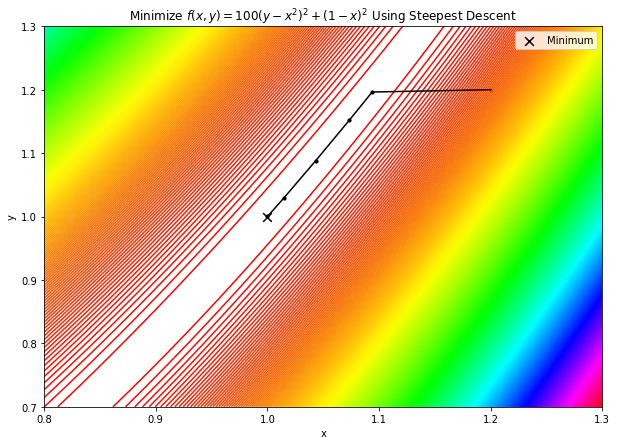

In [181]:
# plot objective function
contourplot(objective_func, [0.8, 1.3], [0.7, 1.3], "Steepest Descent")

# plot random iterations
pt1 = sd_xbar_list[0]
pt2 = sd_xbar_list[300]
pt3 = sd_xbar_list[700]
pt4 = sd_xbar_list[1500]
pt5 = sd_xbar_list[3000]
pt6 = sd_xbar_list[-1]
all_pts = [pt1, pt2, pt3, pt4, pt5, pt6]

for pt in all_pts:
    plt.scatter(pt[0], pt[1], marker='o', s=10, color='black');

for i in range(1, len(all_pts)):
    plt.plot((all_pts[i-1][0], all_pts[i][0]), (all_pts[i-1][1], all_pts[i][1]), color='black');

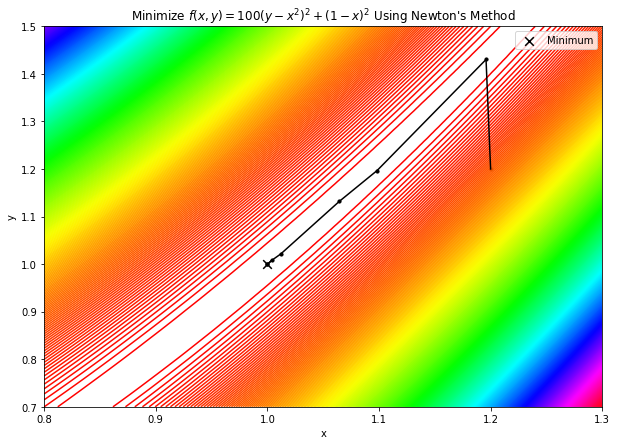

In [187]:
# plot objective function
contourplot(objective_func, [0.8, 1.3], [0.7, 1.5], "Newton's Method")

# plot random iterations
for pt in nm_xbar_list:
    plt.scatter(pt[0], pt[1], marker='o', s=10, color='black');

for i in range(1, len(nm_xbar_list)):
    plt.plot((nm_xbar_list[i-1][0], nm_xbar_list[i][0]), (nm_xbar_list[i-1][1], nm_xbar_list[i][1]), color='black');

## Problem 7
### Plot the size of the objective function as a function of the iteration number. Use semi-log plot.

In [265]:
# steepest descent and newton's method semi-log plots
def plot_semilogy(sd_f_xbar_list, nm_f_xbar_list):
    sd_indx_list = np.linspace(1, len(sd_f_xbar_list), 15)
    nm_indx_list = np.linspace(1, len(nm_f_xbar_list), len(nm_f_xbar_list))

    plt.figure(figsize=(10, 7))
    plt.semilogy(sd_indx_list, sd_f_xbar_list, label='Steepest Descent');
    plt.semilogy(nm_indx_list, nm_f_xbar_list, label="Newton's Method");
    plt.xlabel('Iteration')
    plt.ylabel('Log of f(xbar)')
    plt.title('Algorithm Convergence')
    plt.xticks(np.arange(0,16))
    plt.legend(loc=0)

    return None

In [267]:
np.linspace(sd_df['f(xbar)'].to_list()[0], sd_df['f(xbar)'].to_list()[-1], 15)

array([5.80000000e+00, 5.38571429e+00, 4.97142857e+00, 4.55714286e+00,
       4.14285715e+00, 3.72857143e+00, 3.31428572e+00, 2.90000000e+00,
       2.48571429e+00, 2.07142858e+00, 1.65714286e+00, 1.24285715e+00,
       8.28571435e-01, 4.14285721e-01, 7.68883745e-09])

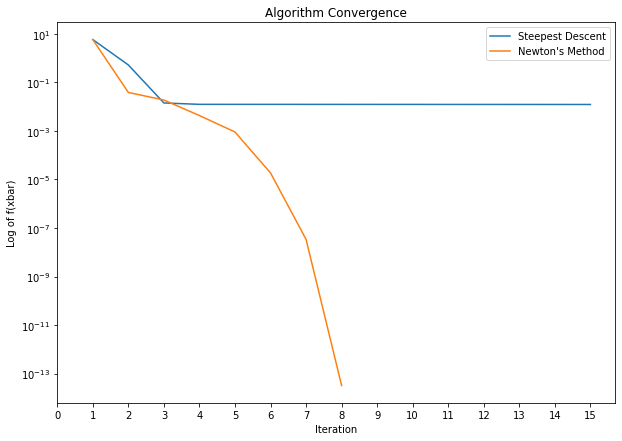

In [269]:
# plot
# we see that the Steepest Descent algorithm is linearly convergent 
# Newton algorithm is significantly faster (quadratically convergent)
sd_f_xbar_list = sd_df['f(xbar)'].to_list()[0:15]
nm_f_xbar_list = nm_df['f(xbar)'].to_list()
plot_semilogy(sd_f_xbar_list, nm_f_xbar_list)

# Problem 8
### Compare the performance for both the Newton and Steepest Descent algorithms; is there a significant difference in number of iterations etc.? Discuss this.

=> The number of iterations for Newton's Method is significantly less than the number of iterations in Steepest Descent. As we can see in the plot above, Steepest Descent converges linearly (constant in a small window) and Newton's Method converges to the minimum quadratically. Newton's Method only required 8 iterations while Steepest Descent required 7612 iterations. 